# 01 Tratamento dos dados

Os dados vieram em .csv, um pixel por coluna.
A ideia é transformar novamente em imagens.

In [9]:
import pandas as pd
import numpy as np
import os
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from PIL import Image 

In [11]:
df_raw = pd.read_csv("../data/mnist_hand_signal/archive/sign_mnist_train.csv")

In [3]:
np.sqrt(784)

28.0

## Criando o none

In [ ]:
none_data_dir = "../data/google_none/"
destination_dir = "../data/google_none_resized/"

# open first image
for file in os.listdir(none_data_dir):
    if file.endswith(".jpg"):
        img = Image.open(none_data_dir + file)

        # resize to 28x28
        img = img.resize((28, 28))

        # grayscale
        img = img.convert("L")

        # show image
        img.show()

        # save image
        img.save(destination_dir + file)

## Exemplo de uma imagem

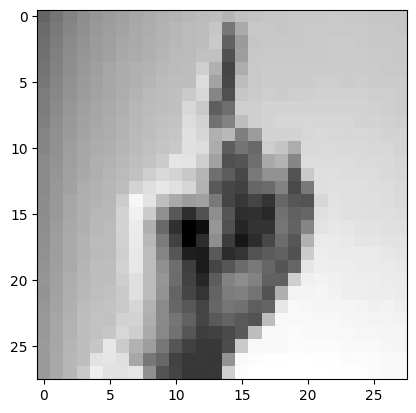

In [12]:
pixels = df_raw.loc[0][1:].to_numpy().reshape(28, 28)
pixels


plt.imshow(pixels, cmap='gray')

# save as image
plt.imsave("test.png", pixels, cmap='gray')

## Upscale?

In [13]:
from super_image import EdsrModel, ImageLoader
from PIL import Image
import requests

url = 'https://paperswithcode.com/media/datasets/Set5-0000002728-07a9793f_zA3bDjj.jpg'
image = Image.open(requests.get(url, stream=True).raw)

model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=2)
inputs = ImageLoader.load_image(image)
preds = model(inputs)

ImageLoader.save_image(preds, './scaled_2x.png')
ImageLoader.save_compare(inputs, preds, './scaled_2x_compare.png')


/media/light/HDD/vision/.linux_venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:678: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

pytorch_model_2x.pt:   0%|          | 0.00/5.51M [00:00<?, ?B/s]

https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_2x.pt


/media/light/HDD/vision/.linux_venv/lib/python3.10/site-packages/super_image/data/loader.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  return torch.as_tensor([lr])


In [14]:
image_path = "test.png"

image = Image.open(image_path)
inputs = ImageLoader.load_image(image)
preds = model(inputs)

# compare
ImageLoader.save_compare(inputs, preds, './scaled_2x_compare.png')

## Upscala nossas imagens

Suspeita que nossas imagens tem resolução muito baixa, e sendo assim vamos tentar aumentar a resolução das imagens para ver se conseguimos melhorar a qualidade das imagens.


In [27]:
root_imgs_path = "../data/mnist_hand_signal/archive/small"
output_path = "../data/upscaled_8"
model_4 = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=4)
model_2 = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=2)

for directory in os.listdir(root_imgs_path):
    if directory == ".DS_Store":
        continue
    for file in os.listdir(root_imgs_path + "/" + directory):
        
        output_file_path = output_path + "/" + directory + "/" + file

        output_file_path_exists = os.path.exists(output_file_path)

        if file.endswith(".png") and not output_file_path_exists:
            print("For directory: " + directory + " and file: " + file)
            image_path = root_imgs_path + "/" + directory + "/" + file

            # create dir
            if not os.path.exists(output_path + "/" + directory):
                os.makedirs(output_path + "/" + directory)

            image = Image.open(image_path)
            inputs = ImageLoader.load_image(image)
            preds = model_2(inputs)
            
            ImageLoader.save_image(preds, "tmp.png")
            # load tmp back
            image2 = Image.open("tmp.png")

            # convert preds to image
            input2 = ImageLoader.load_image(image2)
            preds = model_4(input2)

            ImageLoader.save_image(preds, output_path + "/" + directory + "/" + file)            

https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_4x.pt
https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_2x.pt
For directory: letter_A and file: img_9328.png
For directory: letter_A and file: img_9333.png
For directory: letter_A and file: img_9335.png
For directory: letter_A and file: img_9364.png
For directory: letter_A and file: img_9435.png
For directory: letter_A and file: img_9461.png
For directory: letter_A and file: img_9478.png
For directory: letter_A and file: img_9491.png
For directory: letter_A and file: img_9513.png
For directory: letter_A and file: img_9551.png
For directory: letter_A and file: img_9594.png
For directory: letter_A and file: img_9618.png
For directory: letter_A and file: img_9632.png
For directory: letter_A and file: img_967.png
For directory: letter_A and file: img_968.png
For directory: letter_A and file: img_9708.png
For directory: letter_A and file: img_9711.png
For directory: letter_A and file: img_9772.png
Fo

### Ainda mais

In [ ]:
root_imgs_path = "../data/mnist_hand_signal/archive/small"
output_path = "../data/upscaled_8"

for directory in os.listdir(root_imgs_path):
    if directory == ".DS_Store":
        continue
    for file in os.listdir(root_imgs_path + "/" + directory):
        
        output_file_path = output_path + "/" + directory + "/" + file

        output_file_path_exists = os.path.exists(output_file_path)

        if file.endswith(".png") and not output_file_path_exists:
            print("For directory: " + directory + " and file: " + file)
            image_path = root_imgs_path + "/" + directory + "/" + file

            # create dir
            if not os.path.exists(output_path + "/" + directory):
                os.makedirs(output_path + "/" + directory)

            image = Image.open(image_path)
            inputs = ImageLoader.load_image(image)
            preds = model(inputs)

            # increase image (preds) size by 3x
            preds.resize((28*3, 28*3))
            ImageLoader.save_image(preds, output_path + "/" + directory + "/" + file)            

## Upscale 4

In [20]:
model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=4)

root_imgs_path = "../data/mnist_hand_signal/archive/small"
output_path = "../data/upscaled_4"

for directory in os.listdir(root_imgs_path):
    if directory == ".DS_Store":
        continue
    for file in os.listdir(root_imgs_path + "/" + directory):
        if file.endswith(".png") or file.endswith(".jpg"):
            print("For directory: " + directory + " and file: " + file)
            image_path = root_imgs_path + "/" + directory + "/" + file

            # create dir
            if not os.path.exists(output_path + "/" + directory):
                os.makedirs(output_path + "/" + directory)

            image = Image.open(image_path)
            inputs = ImageLoader.load_image(image)
            preds = model(inputs)
            ImageLoader.save_image(preds, output_path + "/" + directory + "/" + file)            

/media/light/HDD/vision/.linux_venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:678: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


pytorch_model_4x.pt:   0%|          | 0.00/6.10M [00:00<?, ?B/s]

https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_4x.pt
For directory: letter_A and file: img_9328.png
For directory: letter_A and file: img_9333.png
For directory: letter_A and file: img_9335.png
For directory: letter_A and file: img_9364.png
For directory: letter_A and file: img_9435.png
For directory: letter_A and file: img_9461.png
For directory: letter_A and file: img_9478.png
For directory: letter_A and file: img_9491.png
For directory: letter_A and file: img_9513.png
For directory: letter_A and file: img_9551.png
For directory: letter_A and file: img_9594.png
For directory: letter_A and file: img_9618.png
For directory: letter_A and file: img_9632.png
For directory: letter_A and file: img_967.png
For directory: letter_A and file: img_968.png
For directory: letter_A and file: img_9708.png
For directory: letter_A and file: img_9711.png
For directory: letter_A and file: img_9772.png
For directory: letter_A and file: img_9839.png
For directory: letter_A and file

In [19]:
root_imgs_path = "../data/google_none_resized/"
output_path = "../data/upscaled"

for directory in os.listdir(root_imgs_path):
    if directory == ".DS_Store":
        continue
    for file in os.listdir(root_imgs_path + "/" + directory):
        if file.endswith(".jpg"):
            print("For directory: " + directory + " and file: " + file)
            image_path = root_imgs_path + "/" + directory + "/" + file

            # create dir
            if not os.path.exists(output_path + "/" + directory):
                os.makedirs(output_path + "/" + directory)

            image = Image.open(image_path)
            inputs = ImageLoader.load_image(image)
            preds = model(inputs)
            ImageLoader.save_image(preds, output_path + "/" + directory + "/" + file)            

For directory: none and file: 1000.jpg
For directory: none and file: 1005.jpg
For directory: none and file: 1031.jpg
For directory: none and file: 1033.jpg
For directory: none and file: 1041.jpg
For directory: none and file: 1048.jpg
For directory: none and file: 1067.jpg
For directory: none and file: 1072.jpg
For directory: none and file: 1083.jpg
For directory: none and file: 1089.jpg
For directory: none and file: 1101.jpg
For directory: none and file: 1107.jpg
For directory: none and file: 1119.jpg
For directory: none and file: 1128.jpg
For directory: none and file: 1134.jpg
For directory: none and file: 1189.jpg
For directory: none and file: 1198.jpg
For directory: none and file: 1206.jpg
For directory: none and file: 1214.jpg
For directory: none and file: 122.jpg
For directory: none and file: 349.jpg
For directory: none and file: 363.jpg
For directory: none and file: 386.jpg
For directory: none and file: 39.jpg
For directory: none and file: 394.jpg
For directory: none and file: 42

## Loop para todas as imagens

In [2]:
save_images = False

if save_images:
    number_of_rows = df_raw.shape[0]

    for i in range(number_of_rows+1):
        pixels = df_raw.loc[i][1:].to_numpy().reshape(28, 28)
        label = df_raw.loc[i][0]
        plt.imshow(pixels, cmap='gray')

        output_dir = f"../data/mnist_hand_signal/archive/to_image/{label}/img_{i}.png"
        
        if not os.path.exists(f"../data/mnist_hand_signal/archive/to_image/{label}"):
            os.makedirs(f"../data/mnist_hand_signal/archive/to_image/{label}")

        plt.imsave(output_dir, pixels, cmap='gray')
        print(f"saved img: {output_dir}")

## Imitar o modelo

In [ ]:
from mediapipe_model_maker import gesture_recognizer

In [4]:
hparams = gesture_recognizer.HandDataPreprocessingParams()

In [7]:
hparams.__dataclass_fields__

{'shuffle': Field(name='shuffle',type=<class 'bool'>,default=True,default_factory=<dataclasses._MISSING_TYPE object at 0x7f9146b20fd0>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,_field_type=_FIELD),
 'min_detection_confidence': Field(name='min_detection_confidence',type=<class 'float'>,default=0.7,default_factory=<dataclasses._MISSING_TYPE object at 0x7f9146b20fd0>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,_field_type=_FIELD)}

## Small set

In [9]:
IMAGES_PATH = "../data/mnist_hand_signal/archive/small/"

data = gesture_recognizer.Dataset.from_folder(
    dirname=IMAGES_PATH,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)

INFO:tensorflow:Loading image /media/light/HDD/vision/video/data/mnist_hand_signal/archive/small/none/img_11173.png
INFO:tensorflow:Loading image /media/light/HDD/vision/video/data/mnist_hand_signal/archive/small/2/img_25857.png
INFO:tensorflow:Loading image /media/light/HDD/vision/video/data/mnist_hand_signal/archive/small/1/img_4080.png
INFO:tensorflow:Loading image /media/light/HDD/vision/video/data/mnist_hand_signal/archive/small/3/img_914.png
INFO:tensorflow:Loading image /media/light/HDD/vision/video/data/mnist_hand_signal/archive/small/3/img_15816.png
INFO:tensorflow:Loading image /media/light/HDD/vision/video/data/mnist_hand_signal/archive/small/1/img_3971.png
INFO:tensorflow:Loading image /media/light/HDD/vision/video/data/mnist_hand_signal/archive/small/3/img_5737.png
INFO:tensorflow:Loading image /media/light/HDD/vision/video/data/mnist_hand_signal/archive/small/none/img_27442.png
INFO:tensorflow:Loading image /media/light/HDD/vision/video/data/mnist_hand_signal/archive/smal

2024-03-17 10:57:57.598794: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-17 10:57:57.599248: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /media/light/HDD/vision/.linux_venv/lib/python3.10/site-packages/cv2/../../lib64:
2024-03-17 10:57:57.599338: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /media/light/HDD/vision/.linux_venv/lib/python3.10/site-packages/cv2/../../lib64:
2024-03-17 10:57:57.599419: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library '

INFO:tensorflow:Load valid hands with size: 37, num_label: 4, labels: none,1,2,3.


In [10]:
# Split the archive into training, validation and test dataset.
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

In [11]:
# Train the model
hparams = gesture_recognizer.HParams(export_dir="american_hand_sign_model")
options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)

model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer)  [(None, 128)]            0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 custom_gesture_recognizer_o  (None, 4)                516       
 ut (Dense)                                                      
                                                                 
Total params: 1,028
Trainable params: 772
Non-trainable param

In [12]:
loss, acc = model.evaluate(test_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

4/4 [==============================] - 0s 5ms/step - loss: 0.0472 - categorical_accuracy: 1.0000
Test loss:0.04723948985338211, Test accuracy:1.0


## Teste

In [17]:
model.export_model()

INFO:tensorflow:Assets written to: /tmp/tmpk34p2cph/saved_model/assets


2024-03-17 11:02:49.545625: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-03-17 11:02:49.545658: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-03-17 11:02:49.546218: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpk34p2cph/saved_model
2024-03-17 11:02:49.547673: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-03-17 11:02:49.547693: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpk34p2cph/saved_model
2024-03-17 11:02:49.550582: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2024-03-17 11:02:49.551297: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2024-03-17 11:02:49.568536: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: 

In [18]:
model_path = "american_hand_sign_model/gesture_recognizer.task"

# Create a GestureRecognizer object.
# model_path = os.path.abspath("rock_paper_scissors.task")
recognizer = vision.GestureRecognizer.create_from_model_path(model_path)

W20240317 11:03:54.826385 27744 gesture_recognizer_graph.cc:121] Hand Gesture Recognizer contains CPU only ops. Sets HandGestureRecognizerGraph acceleartion to Xnnpack.


## Check ao vivo

In [19]:
# Load the input image.
image = mp.Image.create_from_file('../data/test/1.png')

# Run gesture recognition.
recognition_result = recognizer.recognize(image)

# Display the most likely gesture.
top_gesture = recognition_result.gestures[0][0]
print(f"Gesture recognized: {top_gesture.category_name} ({top_gesture.score})")

Gesture recognized: 1 (0.7905559539794922)


# Stream de video

In [21]:
# capture video
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    cv2.imshow("frame", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # send frame to recognizer
    image = mp.Image(frame)

    # convert image to 28x28
    image = image.resize((28, 28))

    # Run gesture recognition.
    recognition_result = recognizer.recognize(image)

    # Display the most likely gesture.
    top_gesture = recognition_result.gestures[0][0]
    print(f"Gesture recognized: {top_gesture.category_name} ({top_gesture.score})")

cap.release()
cv2.destroyAllWindows()



[ WARN:0@1199.019] global cap_v4l.cpp:997 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@1199.020] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range


error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


: 